In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME") 
    puidata =os.getenv("PUIDATA")

%pylab inline
import os
import json


Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    #os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    #os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
   # os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

datestring = '201402'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:

df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       ], axis=1, inplace=True)

Plot your data distributions. The data left at this point should be the data that you think will be useful to answer your question. Drop all other columns/rows.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


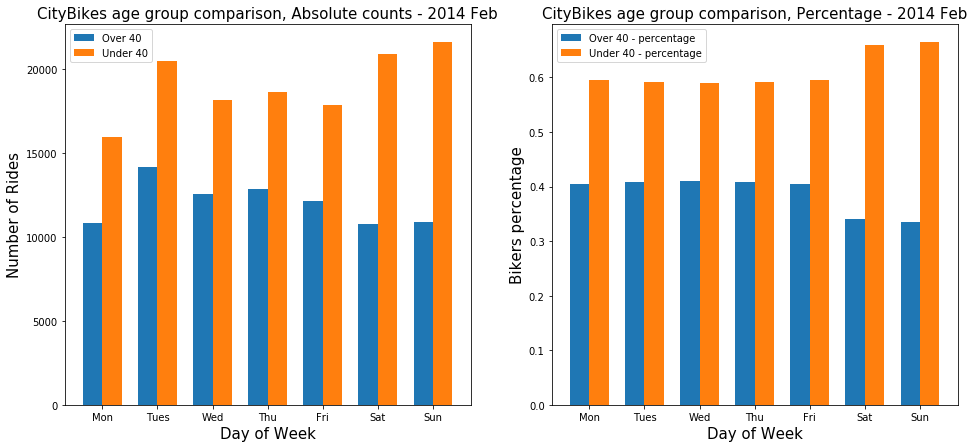

In [28]:
df.head(10)
df_1= df.loc[df['birth year'] != '\N' ]
df_1['birth year']=pd.to_numeric(df_1['birth year'])

over_40=((df_1['date'][df_1['birth year'] < 1974].groupby([df['date'].dt.weekday]).count()))
under_40 =((df_1['date'][df_1['birth year'] >=1974].groupby([df['date'].dt.weekday]).count()))


over_40_percent = over_40/(over_40+under_40)
under_40_percent = under_40/(over_40+under_40)

fig = pl.figure(figsize=(16,7))
ax1 = fig.add_subplot(121)

ind = np.arange(7) 
width = 0.35       
plt.bar(ind, over_40, width, label='Over 40')
plt.bar(ind + width, under_40, width,
    label='Under 40')
ax1.set_ylabel('Number of Rides',fontsize=15)
ax1.set_xlabel('Day of Week',fontsize=15)
ax1.set_title('CityBikes age group comparison, Absolute counts - 2014 Feb',fontsize=15)

plt.xticks(ind + width / 2, ('Mon', 'Tues', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.legend(loc='best')
                
ax2 = fig.add_subplot(122)

plt.bar(ind, over_40_percent, width, label='Over 40 - percentage')
plt.bar(ind + width, under_40_percent, width,label='Under 40 - percentage')
ax2.set_ylabel('Bikers percentage',fontsize=15)
ax2.set_xlabel('Day of Week',fontsize=15)
ax2.set_title('CityBikes age group comparison, Percentage - 2014 Feb',fontsize=15)

plt.xticks(ind + width / 2, ('Mon', 'Tues', 'Wed', 'Thu', 'Fri','Sat','Sun'))
plt.legend(loc='best')
                
                
plt.show()



#### The figure on the left is the distribution of Citibike bikers under and over 40 years old in February 2014 in absolute counts.  The bars tell us each day the numbers are different, but under 40 years old always has more number of riders than over 40 years old, and under 40 has especially more counts on the weekend and Tuesdays.  
#### The figure on the right is the distribution of Citibike bikers under and over 40 years old in February 2014 in percentage.  Different from the absolute counts plot, the percentage bars tell us that from Monday to Friday, the percentages of both under 40 and over 40 stay almost the same, and the percentages of under 40  rise during weekends when the percentages of over 40 drop.
